# This is SD lab project for data visulization and Exploratory Data Analysis in the domain of sports.

## By: Yash Javalkar  USN:2GI17CS171 <br> Suyash Bapat  USN:2GI17CS149
   
       

## FIFA World Cup Predictions Using Machine Learning

## Data Visulization


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set()

world_cup = pd.read_csv('World Cup 2018 Dataset.csv')
results = pd.read_csv('results.csv')

In [54]:
world_cup.head()
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


#### Goal Difference and Establishing the Winner

Now in the below step we distinguish between winner and loser. We need a way for user to be able to tell the system who was the winner or loser of each match

We also need to determine the goal difference

In [55]:
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


we have chosen to analyze the EDA and do the predection for German Mens National Team for now.

In [56]:
df = results[(results['home_team'] == 'Germany') | (results['away_team'] == 'Germany')]
germany = df.iloc[:]
germany.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
209,1908-04-05,Switzerland,Germany,5,3,Friendly,Basel,Switzerland,Switzerland,2
216,1908-06-07,Austria,Germany,3,2,Friendly,Vienna,Austria,Austria,1
234,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,Germany,1
235,1909-04-04,Hungary,Germany,3,3,Friendly,Budapest,Hungary,Draw,0
253,1910-04-03,Switzerland,Germany,2,3,Friendly,Basel,Switzerland,Germany,1


Now we have the matches which only contain the German Mens National Team. However, we're only interested in analzing matches that occured during the World Cup era  we will only look at matches that took place in the fifa worldcup

In [57]:
year = []
for row in germany['date']:
    year.append(int(row[:4]))
germany['match_year'] = year
germany_1930 = germany[germany.match_year >= 1930]
germany_1930.count()

date               863
home_team          863
away_team          863
home_score         863
away_score         863
tournament         863
city               863
country            863
winning_team       863
goal_difference    863
match_year         863
dtype: int64

In the above i have chosen the years after 1930 because our csv file contains all the matches butfifa started after 1930 We have 863 recorded matches for the German Mens National Football Team. We can now visualize the most common outcome for the Germany throughout the years.

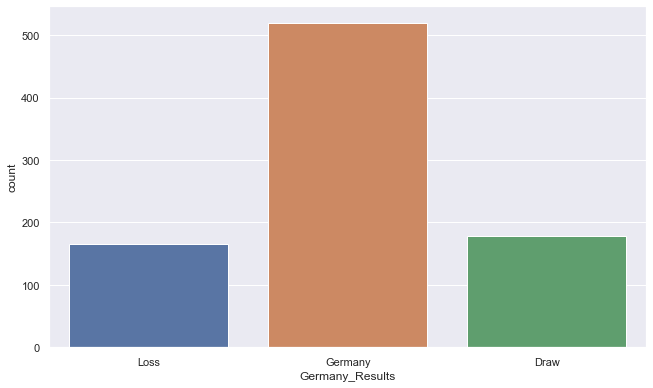

In [58]:
wins = []
for row in germany_1930['winning_team']:
    if row != 'Germany' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf = pd.DataFrame(wins, columns = ['Germany_Results'])

fig, ax = plt.subplots(1)
fig.set_size_inches(10.7,6.27)
sns.set(style = 'darkgrid')
sns.countplot(x = 'Germany_Results', data=winsdf)

# FIFA 2018 winning team Predection using Exploratory Data Analysis

Now for predection we have selecter england as home team, we will list the participating teams in the 2018 World Cup(as our csv file has records only up to 2018 and we will do the predection foe fifa 2018). The teams are outlined in the following groups:

**Group A:** Uruguay, Russia, Saudi Arabia, Egypt
<br>**Group B:** Spain, Portugal, Iran, Morocco
<br>**Group C:** France, Denmark, Peru, Australia
<br>**Group D:** Croatia, Argentina, Nigeria, Iceland
<br>**Group E:** Brazil, Switzerland, Serbia, Costa Rica
<br>**Group F:** Sweden, Mexico, South Korea, Germany
<br>**Group G:** Belgium, England, Tunisia, Panama
<br>**Group H:** Columbia, Japan, Senegal, Poland

With these groups, we need to create a dataframe that shows only teams in this year's world up from 1930 onwards as well as drop duplicates. We also need to create a year column and drop games before the year 1930, as well as columns that won't affect match outcome for example date, tournament, city, country and match_year.

In [59]:
worldcup_teams = ['Australia', 'Iran', 'Japan', 'Korea Republic',
                  'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria',
                  'Senegal', 'Tunisia', 'Costa Rica', 'Mexico',
                  'Panama', 'Argentina', 'Brazil', 'Colombia',
                  'Peru', 'Uruguay', 'Belgium', 'Croatia',
                  'Denmark', 'England', 'France', 'Germany',
                  'Iceland', 'Poland', 'Portugal', 'Russia',
                  'Serbia', 'Spain', 'Sweden', 'Switzerland']

df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country',
                               'goal_difference', 'match_year'], axis = 1)

df_teams_1930.head()

,home_team,away_team,winning_team
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


## Building The Model

We need to establish the prediction labels for our model. Our prediction label will be the winning_team column, which will show "2" if the home team has won, "1" if the match results in a draw, and "0" if the away team has won. we need to do this as we are using Logistic regression algo of machine learning to do prediction and this algorithm takes input only in numerical format.

In [60]:
df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,winning_team
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2


Next, we convert the home_team and away_team columns from categorical variables to continous variables. By using the pd.get_dummies() function, we can assign dummy variables to the categorical variables.

We we separate the labels and features, the train_test_spli function will split the data into 70 percent training and 30 percetn testing.

In [61]:
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
final.head()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning: Match Prediction using Logistic regression

In [63]:
final.head()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print('Training set accuracy ', '%.3f'%(score))
print('Test set accuracy ', '%.3f'%(score2))

F:\softwares\anacond\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\softwares\anacond\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set accuracy  0.571
Test set accuracy  0.564


Passing our features and labels into our algorithm, we recieved a training set accuracy of 0.571 and a testing set accuracy of 0.564, which isn’t the greatest, but we will continue to use these features. At this point, we will create a dataframe that we will deploy out model.

FIFA ranking as of April 2018 data set and a dataset containing the fixtures of the group stages of the tournament. The team which is positioned higher on the FIFA Ranking will be considered the “favorite” of the match, and therefore, will be positioned under the “home_teams” column, since obviously the only home team in this world cup is Russia. We will then add teams to the new prediction dataset based on the ranking position of each team. The next step will be to create dummy variables and then deploy the machine learning model.

In [64]:
# Loading new datasets
fixtures = pd.read_csv('fixtures.csv')
ranking = pd.read_csv('fifa_rankings.csv', encoding = 'latin-1')

# List for storing the group stage games
pred_set = []

# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6,25,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,2 - 2
44,3,60,10,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,0 - 1
45,3,28,16,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,0 - 1
46,3,55,14,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,1 - 2
47,3,13,3,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,0 - 1


In [65]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,home_team,away_team,winning_team
0,Russia,Saudi Arabia,None
1,Uruguay,Egypt,None
2,Iran,Morocco,None
3,Portugal,Spain,None
4,France,Australia,None


In [66]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have all of our features, we can create a for loop that allows us to predict the winner based on our preferred parameters.

In [67]:
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + ' and ' + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print('Winner: ' + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print('Draw')
    elif predictions[i] == 0:
        print('Winner: ' + backup_pred_set.iloc[i, 0])
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i,0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print('')

Saudi Arabia and Russia
Winner: Saudi Arabia
Probability of Draw:  0.245
Probability of Russia winning:  0.096

Egypt and Uruguay
Winner: Egypt
Probability of Draw:  0.319
Probability of Uruguay winning:  0.076

Morocco and Iran
Winner: Morocco
Probability of Draw:  0.322
Probability of Iran winning:  0.281

Spain and Portugal
Draw
Probability of Draw:  0.343
Probability of Portugal winning:  0.335

Australia and France
Winner: Australia
Probability of Draw:  0.238
Probability of France winning:  0.157

Iceland and Argentina
Winner: Iceland
Probability of Draw:  0.136
Probability of Argentina winning:  0.035

Denmark and Peru
Winner: Peru
Probability of Draw:  0.156
Probability of Peru winning:  0.441

Nigeria and Croatia
Winner: Nigeria
Probability of Draw:  0.330
Probability of Croatia winning:  0.134

Serbia and Costa Rica
Winner: Serbia
Probability of Draw:  0.304
Probability of Costa Rica winning:  0.311

Mexico and Germany
Winner: Mexico
Probability of Draw:  0.267
Probability of

Based on this information we will create a knockout stages so thst prediction becomes easy.

### Predicting World Cup Winners

#### Knockout Stage

Based on the model, the following matchups are generated.

**knock_out stage**
<br>**Uruguay** v/s **Portugal**
<br>**France** v/s **Croatia**
<br>**Brazil** v/s **Mexico**
<br>**England** v/s **Colombia**
<br>**Spain** v/s **Russia**
<br>**Argentina** v/s **Peru**
<br>**Germany** v/s **Switzerland**
<br>**Poland** v/s **Belgium**



We will create a list of tuples, which will pair up the teams based on this chart.

In [68]:
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Croatia'),
            ('Brazil', 'Mexico'),
            ('England', 'Colombia'),
            ('Spain', 'Russia'),
            ('Argentina', 'Peru'),
            ('Germany', 'Switzerland'),
            ('Poland', 'Belgium')]

Then we will create a function to clean the csv and predict the winner.

In [69]:
def clean_and_predict(matches, ranking, final, logreg):
    #Initialization of auxiliary list for data cleaning
    positions = []

    #Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0], 'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1], 'Position'].iloc[0])

    #Creating the DataFrame for prediction
    pred_set = []

    #initalizaing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'position' list, and 'j' for the list of matches (list of tuples)

    while i < len(positions):
        dict1 = {}

        # if position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        #Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    #Covert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    #Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix = ['home_team', 'away_team'], columns = ['home_team', 'away_team'])

    #Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    #Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    #Prediction
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i,1] + ' and ' + backup_pred_set.iloc[i,0])
        if predictions[i] == 2:
            print('Winner: ' + backup_pred_set.iloc[i,1])
        elif predictions[i] == 1:
            print('Draw')
        elif predictions[i] == 0:
            print('Winner: ' + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i,1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
        print('Probaility of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print('')

clean_and_predict(group_16, ranking, final, logreg)

Uruguay and Portugal
Winner: Uruguay
Probability of Uruguay winning:  0.441
Probability of Draw:  0.278
Probaility of Portugal winning:  0.281

Croatia and France
Winner: Croatia
Probability of Croatia winning:  0.476
Probability of Draw:  0.209
Probaility of France winning:  0.314

Mexico and Brazil
Winner: Mexico
Probability of Mexico winning:  0.702
Probability of Draw:  0.199
Probaility of Brazil winning:  0.098

Colombia and England
Winner: Colombia
Probability of Colombia winning:  0.513
Probability of Draw:  0.367
Probaility of England winning:  0.120

Russia and Spain
Winner: Russia
Probability of Russia winning:  0.520
Probability of Draw:  0.270
Probaility of Spain winning:  0.211

Peru and Argentina
Winner: Peru
Probability of Peru winning:  0.684
Probability of Draw:  0.249
Probaility of Argentina winning:  0.066

Switzerland and Germany
Winner: Switzerland
Probability of Switzerland winning:  0.668
Probability of Draw:  0.214
Probaility of Germany winning:  0.118

Poland a

Our model has projected the winners in the knockout stage. Now we will create lists of all winners for quater finals.

#### Quarter-Finals

Using the same function, we will now create a list a tuples based on the projected outcome of our Group of 16 matches.

In [70]:
quarters = [('Uruguay', 'Croatia'),
            ('Mexico', 'Colombia'),
            ('Russia', 'Peru'),
            ('Switzerland', 'Poland')]

clean_and_predict(quarters, ranking, final, logreg)

Croatia and Uruguay
Winner: Croatia
Probability of Croatia winning:  0.502
Probability of Draw:  0.247
Probaility of Uruguay winning:  0.251

Colombia and Mexico
Winner: Colombia
Probability of Colombia winning:  0.398
Probability of Draw:  0.363
Probaility of Mexico winning:  0.239

Russia and Peru
Winner: Peru
Probability of Russia winning:  0.227
Probability of Draw:  0.265
Probaility of Peru winning:  0.508

Poland and Switzerland
Winner: Poland
Probability of Poland winning:  0.415
Probability of Draw:  0.213
Probaility of Switzerland winning:  0.371



As the tournament progresses, the winners become less certain, according to our model. 

#### Semi-Finals

Now we create a list based on the projected winners of the Quarter-Final matches. Which is Croatia v/s Colombia and Peru v/s Poland

In [71]:
semi = [('Croatia', 'Colombia'),
        ('Peru', 'Poland')]

clean_and_predict(semi, ranking, final, logreg)

Croatia and Colombia
Winner: Colombia
Probability of Croatia winning:  0.338
Probability of Draw:  0.217
Probaility of Colombia winning:  0.445

Peru and Poland
Winner: Peru
Probability of Peru winning:  0.465
Probability of Draw:  0.338
Probaility of Poland winning:  0.197



In semi finals we have Colombia and Peru as the winners.

#### Grand Finals

This time, we will only create one list of with the semi-final winners: Colombia and Peru.

In [72]:
finals = [('Colombia', 'Peru')]

clean_and_predict(finals, ranking, final, logreg)

Colombia and Peru
Winner: Peru
Probability of Colombia winning:  0.331
Probability of Draw:  0.317
Probaility of Peru winning:  0.352



According to the model, Peru is likely to win the World Cup, with a winning probility of 0.352% than losing probility of 0.331%